<a href="https://colab.research.google.com/github/manassanant132/Fundamental-of-Deep-Learning/blob/main/Unit9_Visualizing_Kernels_and_Feature_Maps_in_Deep_Learning_Model_(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

แนวคิดของ Convolution นั้นทรงพลัง และสามารถเพิ่มประสิทธิภาพให้แก่ Neural Network Model ได้เป็นอย่างมาก โดยเฉพาะในยุคปัจจุบันที่ราคา Computer Hardware เช่น GPU นั้นถูกกว่าสมัยก่อนจนจับต้องได้ไม่ยากนัก

CNN (Convolutional Neural Network) เป็นโครงสร้างภายใน Deep Learning Model ที่ใช้แนวคิดของ Convolution ในการทำงานกับข้อมูล 2 มิติ เช่น Image Data ซึ่งแต่ละ Pixel ของ Image จะมีความสัมพันธ์กันในเชิงพื้นที่ (Spatial Relationship)

ด้วยลักษณะโครงสร้างของ CNN ที่ถูกออกแบบมาเพื่อทำงานกับ Image Data ในตอนเริ่มต้น เราจึงสามารถแสดงข้อมูลที่เป็นองค์ประกอบของการตัดสินใจหรือการทำนายของ Model ด้วยภาพได้ดีกว่า Neural Network ชนิดอื่นๆ ที่จะไม่สามารถแสดงให้เห็นและอธิบายเหตุผลได้ว่าทำไมมันจึงมีการตัดสินใจหรือคาดคะเนผลลัพธ์ออกมาแบบนั้น

CNN ประกอบด้วย Kernel และผลลัพธ์จากการกระทำทางคณิตศาสตร์ของ Kernel กับ Input Image ที่เรียกว่า Activation Map หรือ Feature Map โดยทั้ง Kernel และ Feature Map นั้นสามารถแสดงผลได้ด้วยภาพ

ในบทความนี้ผู้อ่านจะได้ทำความเข้าใจแนวคิดของ CNN และทำ Workshop เพื่อดึง Kernel และ Feature Map ของ Fashion-MNIST Model ออกมาแสดงผลครับ

#2D Convolutions Concept


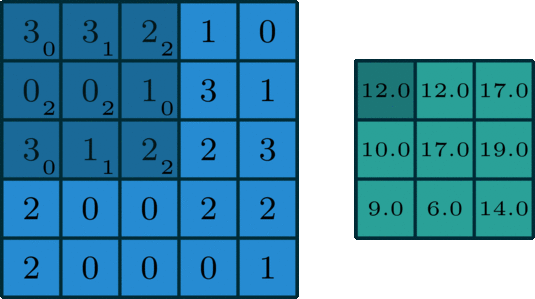

2D Convolution เป็นการนำ Matrix ขนาดเล็ก ของ Weight หรือที่เรียกว่า Kernel มา Slide ไปบน 2D Input Image (สีฟ้าด้านบนซ้ายมือ) โดยขณะที่มีการทาบ Kernel บน Input Image มันจะคูณค่าแต่ละ Pixel ของ Input Image กับ Kernel แล้วนำผลลัพธ์ทั้งหมดมาบวกกันเป็น 1 จุด Pixel ของ Feature Map (สีเขียวขวามือ)

2D Convolution ที่มีการสร้าง Feature Map ขึ้นมาด้วยการนำ Kernel Slide ไปบน Input Image จะใช้ Parameter น้อยกว่า Fully Connected Layer

โดยจากตัวอย่าง ในการนำภาพขนาด 5x5 Pixel เข้า Model, 2D Convolution Layer จะใช้จำนวน Parameter เท่ากับขนาดของ Kernel คือ 3x3 = 9 Parameter ขณะที่ถ้าเป็น Fully Connected Layer จะใช้จำนวน Parameter เท่ากับขนาดของ Input Image x 9 = 5x5x9 = 225 Parameter!

# Padding

ตามภาพด้านบน ขณะที่มีการ Slide Kernel เราจะเห็นว่า Pixel ตรงขอบภาพสีฟ้าจะไม่มีทางอยู่ตรงกลาง Kernel ตอนที่มันทาบลงไป เพราะเราไม่สามารถขยาย Kernel ให้เลยออกไปนอกขอบของภาพ จึงทำให้ Feature Map ที่ได้มีขนาดเล็กกว่า Input Image ครับ

ดังนั้น เพื่อจะทำให้ Feature Map มีขนาดเท่ากับ Input Image และ Pixel ที่ขอบภาพอยู่ตรงกลาง Kernel ตอนที่มันทาบลงไป เราจะต้องมีการทำ Padding โดยการเสริมกรอบด้วยการเติม 0 (Zero Padding) รอบๆ ภาพเดิม

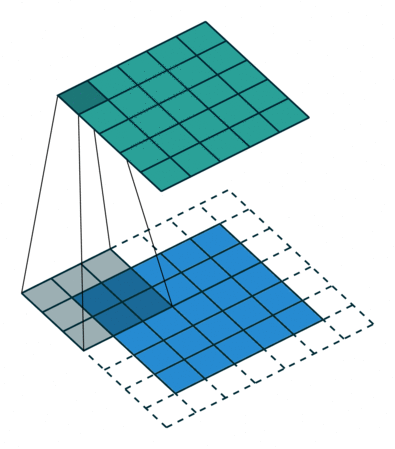

# Striding

การ Striding เป็นกระบวนการในการทำ Convolution โดยการเลื่อนแผ่น Kernel ไปบน Input Image ซึ่งโดย Default ของ Convolution แล้ว Stride จะมีค่าเท่ากับ 1 คือจะมีการเลื่อน Kernel ไปบน Input Image ครั้งละ 1 Pixel

เราสามารถลดขนาดของภาพที่แต่ละ Pixel มีความสัมพันธ์กันในเชิงพื้นที่ได้โดยการเพิ่มค่า Stride ซึ่งเมื่อมีการกำหนดค่า Stride มากขึ้น จะทำให้การเลื่อมกันของ Kernel ตอนที่มีการทาบกับ Input Image และขนาดของ Feature Map ลดลง

เมื่อกำหนด Stride เท่ากับ 2 แล้ว Kernel ขนาด 3x3 จะถูก Slide ข้าม Pixel ของ Input Image ขนาด 5x5 ทีละ 2 Pixel ทำให้ได้ Feature Map ขนาด 2x2 ดังภาพด้านล่าง

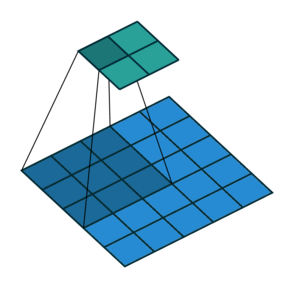

# Pooling
นอกจากการลดขนาดของภาพด้วยการเพิ่มค่า Stride โดยการ Slide Kernel ข้าม Pixel ของ Input Image ตามระยะทางที่กำหนดแล้ว ยังมีอีกวิธีหนึ่งในการลดขนาดของภาพ คือการทำ Max Pooling หรือ Average Pooling โดย Pooling จะเป็นกระบวนการทำงานภายนอก CNN Layer

Max Pooling หรือ Average Pooling จะเป็นการเลือกตัวแทนของภาพด้วยการหาค่ามากที่สุด หรือค่าเฉลี่ยจาก Pixel ใน Window ตามขนาดที่กำหนด เช่น ขนาด 2x2 ซึ่งจะทำให้มีการลดขนาดของภาพลงได้ครึ่งหนึ่งดังตัวอย่างด้านบน

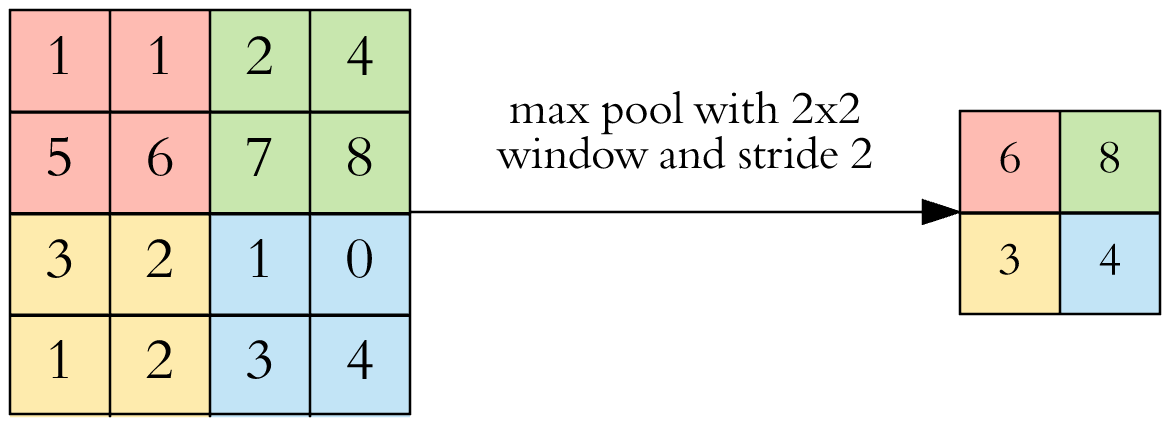

# Multi-channel



อย่างไรก็ตาม ในตัวอย่างที่ผ่านมาจะเป็นการจัดการกับ Input Image แบบ 1 Channel เช่น ภาพแบบ Grayscale แต่บ่อยครั้งที่ Input Image ของเราจะเป็นภาพสี แบบ 3 Channel (โดยทั่วไปจำนวน Channel ของ Input Image จะเพิ่มขึ้นเมื่อมันถูกส่งเข้าสู่ชั้น CNN Layer ที่ลึกขึ้น)



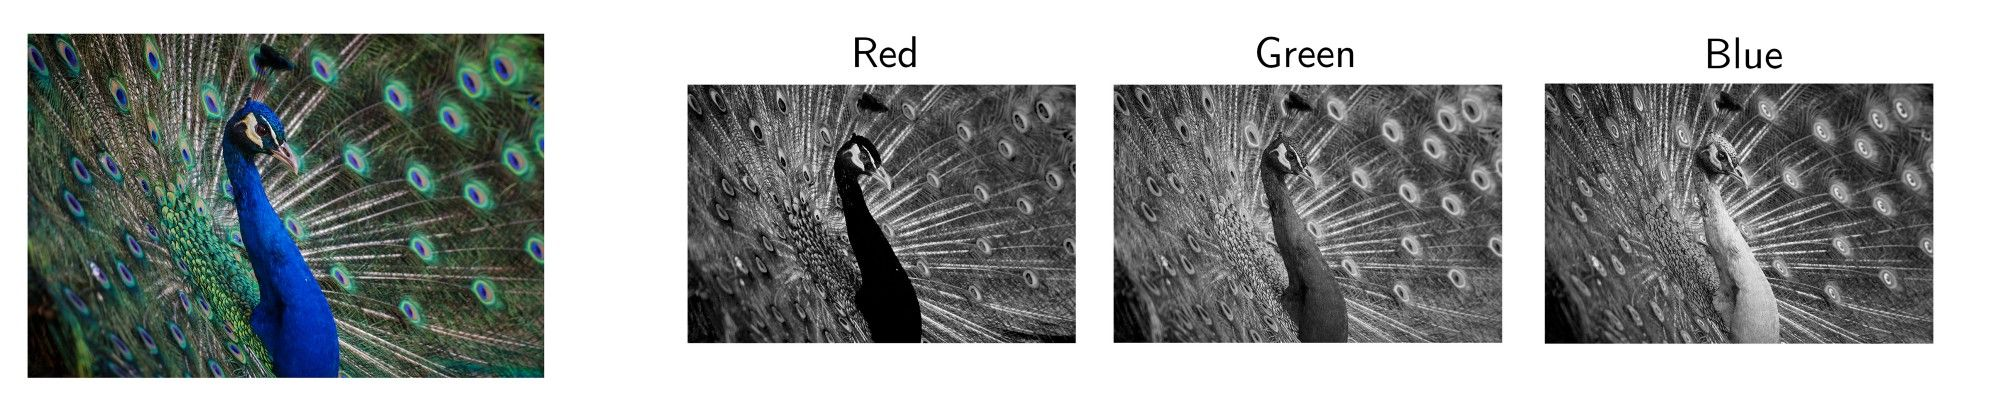

เพื่อจะจัดการกับ Input Image แบบ 3 Channel อย่างเช่นภาพสีในระบบ RGB เราจะต้องใช้ Kernel จำนวน 3 ตัว ในการ Slide ไปบน Input Image แต่ละ Channel ซึ่งเราเรียก Kernel ทั้ง 3 ตัวว่า Filter (ในที่นี้ 1 Filter ประกอบด้วย Kernel 3 Kernel)

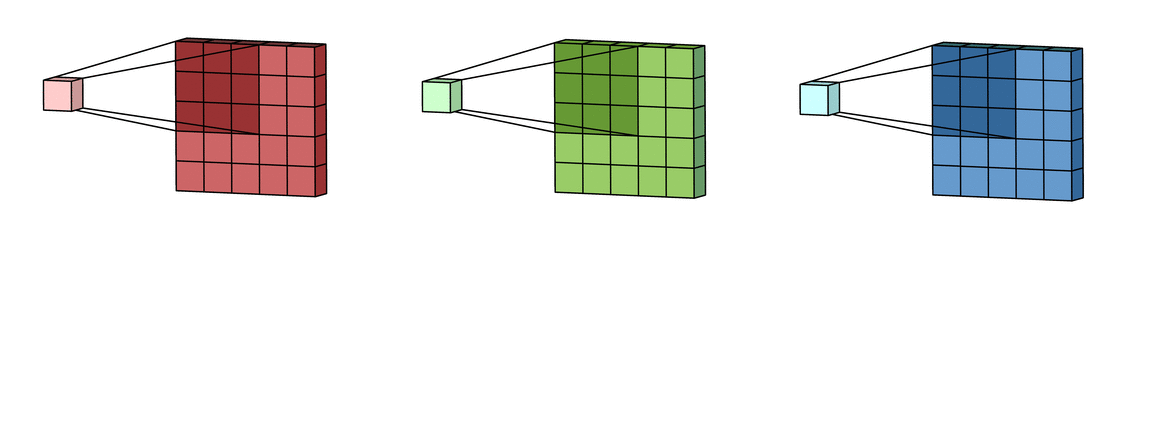

Feature Map แต่ละ Version ขนาด 3x3 ที่เกิดจากการ Slide Kernel ไปบน Input Channel ขนาด 5x5 จะถูกนำมารวมกันเป็น Output Channel 1 Channel เพื่อจะส่งต่อไปยัง Neural Network Layer ถัดไป

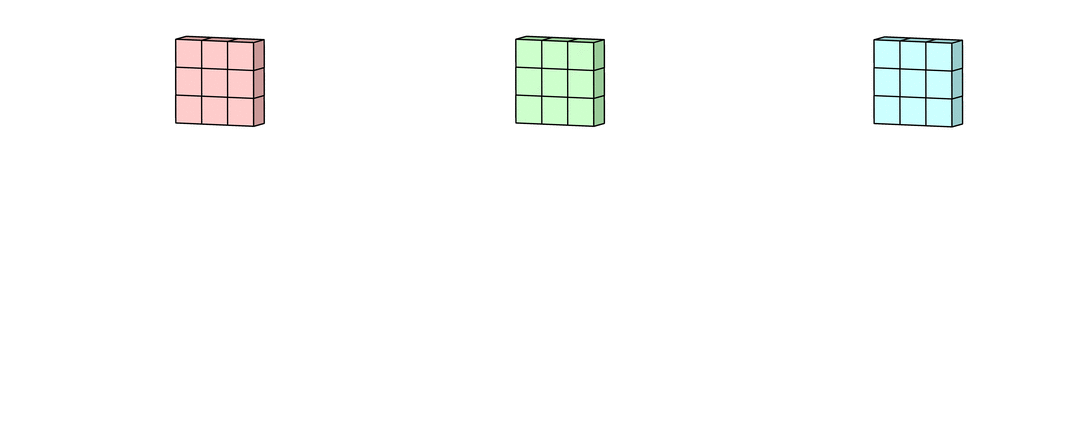

ซึ่ง Output Channel จะถูกนำมาบวกกับ Bias ในขั้นตอนสุดท้ายของกระบวนการทำ Convolution

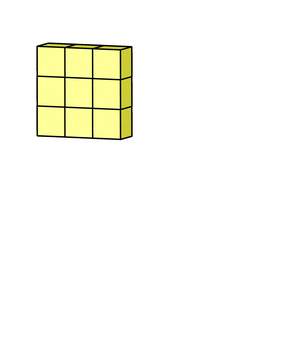

เพื่อจะสร้าง Output Channel 1 Channel ดังภาพด้านบน เราจะต้องใช้ Filter 1 Filter ซึ่งแต่ละ Filter ก็จะประกอบด้วยจำนวน Kernel 3 Kernel ดังนั้นในกรณีที่ต้องการสร้าง Output Channel หลาย Channel เราจะต้องมีจำนวน Filter หลาย Filter ครับ

#Visualizing CNN

Import Library และกำหนดค่า Parameter ที่จำเป็น

In [ ]:
import tensorflow as tf

load_img = tf.keras.preprocessing.image.load_img
img_to_array = tf.keras.preprocessing.image.img_to_array
array_to_img = tf.keras.preprocessing.image.array_to_img
Adam = tf.keras.optimizers.Adam
fashion_mnist = tf.keras.datasets.fashion_mnist
to_categorical = tf.keras.utils.to_categorical
ImageDataGenerator = tf.keras.preprocessing.image.ImageDataGenerator
ModelCheckpoint = tf.keras.callbacks.ModelCheckpoint
load_model = tf.keras.models.load_model

from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

import plotly.graph_objs as go
from plotly import subplots
import plotly

Lets see the cat!
แต่ก่อนอื่นเราจะอ่านไฟล์ภาพน้องเหมียวตังค์ฟูล มาทดลองนำเข้า CNN Model ที่ยังไม่ถูก Train ตามขั้นตอน ดังนี้

อ่านไฟล์ภาพน้องตังค์ฟูล และPlot ภาพน้อง

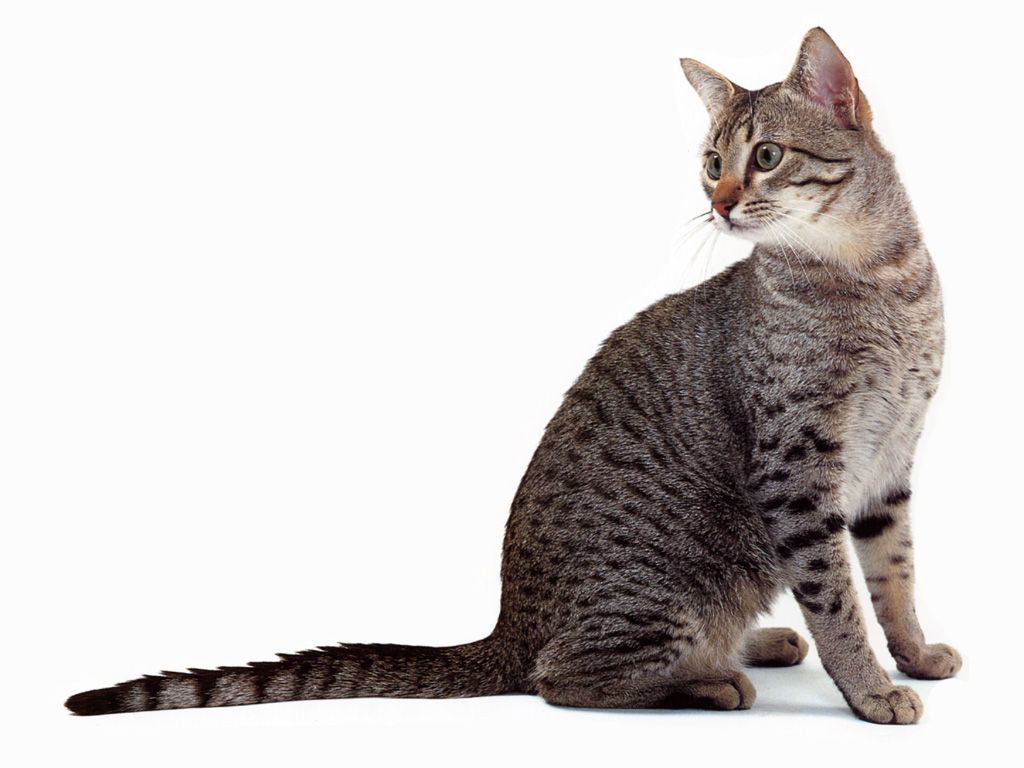

In [ ]:
cat = load_img('/content/cat1.jpg')
cat


แปลงภาพเป็น Array และแสดง Shape ของภาพ

In [ ]:
cat = img_to_array(cat)
print(cat.shape)

(768, 1024, 3)


#Create a Model with 2D CNN Layer
นิยาม Model แบบ 2D Convolution โดยรับ Input Image ขนาด 1,440x1,080 Pixel แบบ 3 Channel โดยมี Filter ขนาด 3x3 จำนวน 3 Filter เพื่อนำไป Slide บน Input Image ของแต่ละ Channel



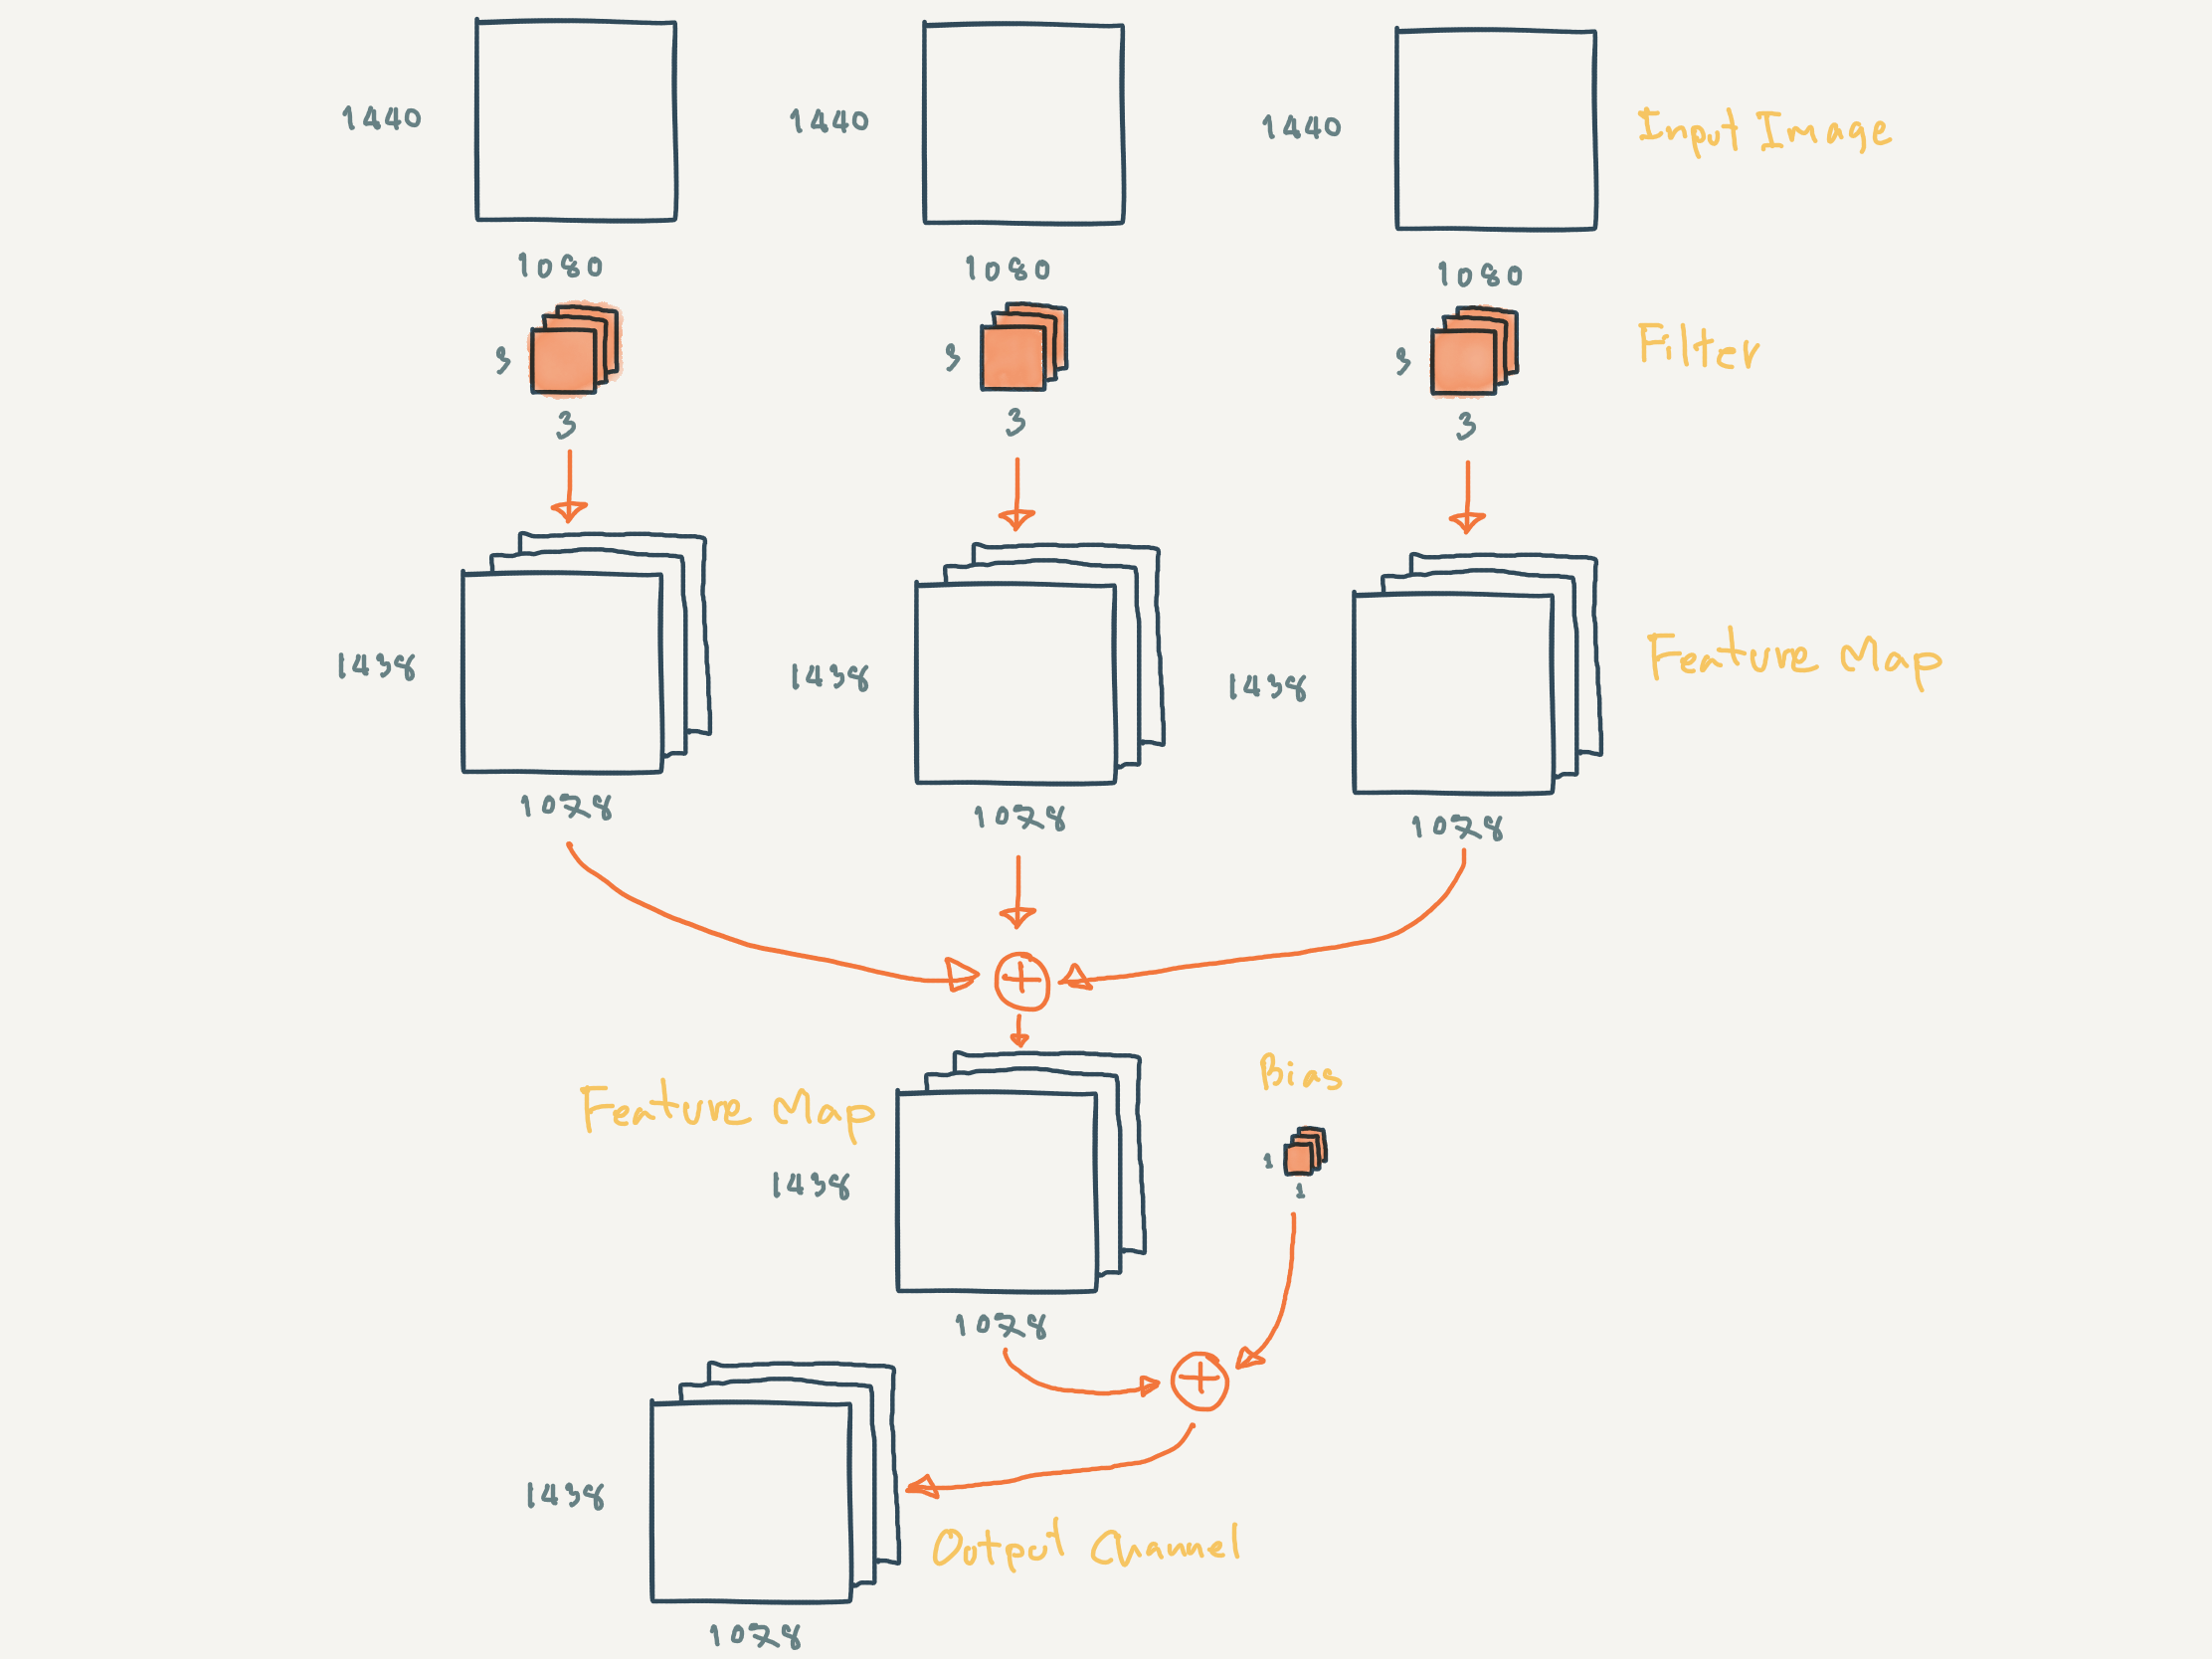

จากภาพด้านบน Model ของเราจะมีจำนวน Parameter เท่ากับ (Filter + Bias) 3x3x3x3 + 3 = 84 Parameter

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(3, # number of filter layers
                (3,                 # y dimension of kernel
                 3),                # x dimension of kernel
                 input_shape=cat.shape))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 766, 1022, 3)      84        
                                                                 
Total params: 84
Trainable params: 84
Non-trainable params: 0
_________________________________________________________________


ขยายมิติของภาพจาก 3 มิติเป็น 4 มิติ เพื่อทดลองนำเข้า Model


In [ ]:
cat_batch = np.expand_dims(cat,axis=0)
cat_batch.shape

(1, 768, 1024, 3)

นำเข้า Model โดยใช้ค่า Weight และ Bias แบบสุ่มในตอนเริ่มต้น โดยยังไม่มีการ Train Model

In [ ]:
conv_cat = model(cat_batch)
conv_cat.shape

TensorShape([1, 766, 1022, 3])

เนื่องจากเรามีการนิยาม Model โดยกำหนดจำนวน Filter ไว้ที่ 3 Filter ดังนั้นจึงทำให้ได้ Output Channel ขนาด 1,438x1,078 ทั้งหมด 3 Channel ซึ่งขนาดของ Output Channel จะลดลงจากเดิม 1,440x1,080 Pixel เนื่องมาจาก มีการ Slide Kernel ขนาด 3x3 ไปบน Input Image โดยไม่มีการทำ Padding



ลดมิติของ Array จาก Output ของ Model เพื่อเตรียม Plot ภาพ

In [ ]:
conv_cat = np.squeeze(conv_cat, axis=0)
conv_cat.shape

(766, 1022, 3)

แปลง Array เป็นภาพ แล้ว Plot ภาพ

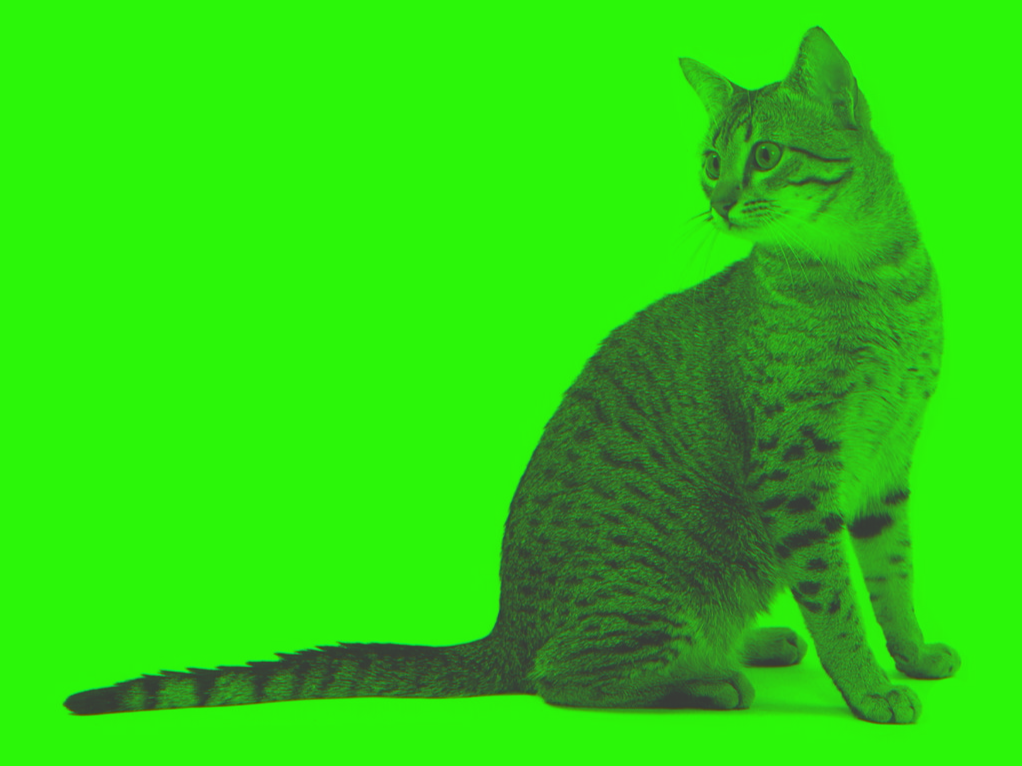

In [ ]:
conv_cat = array_to_img(conv_cat)
display(conv_cat)

นิยาม visualize_cat Function ที่รับภาพเป็น Matrix, ขยายภาพเป็น 4 มิติ แล้ว Predict ภาพ ก่อนจะหดให้เหลือ 3 มิติเท่าเดิมเพื่อจะ Plot ภาพต่อไป

In [ ]:
def visualize_cat(model, cat):
    cat_batch = np.expand_dims(cat,axis=0)
    conv_cat = model(cat_batch)
    conv_cat = np.squeeze(conv_cat, axis=0)
    conv_cat = array_to_img(conv_cat)
    display(conv_cat)

Plot ภาพน้องตังค์ฟูลอีกครั้งจาก visualize_cat Function

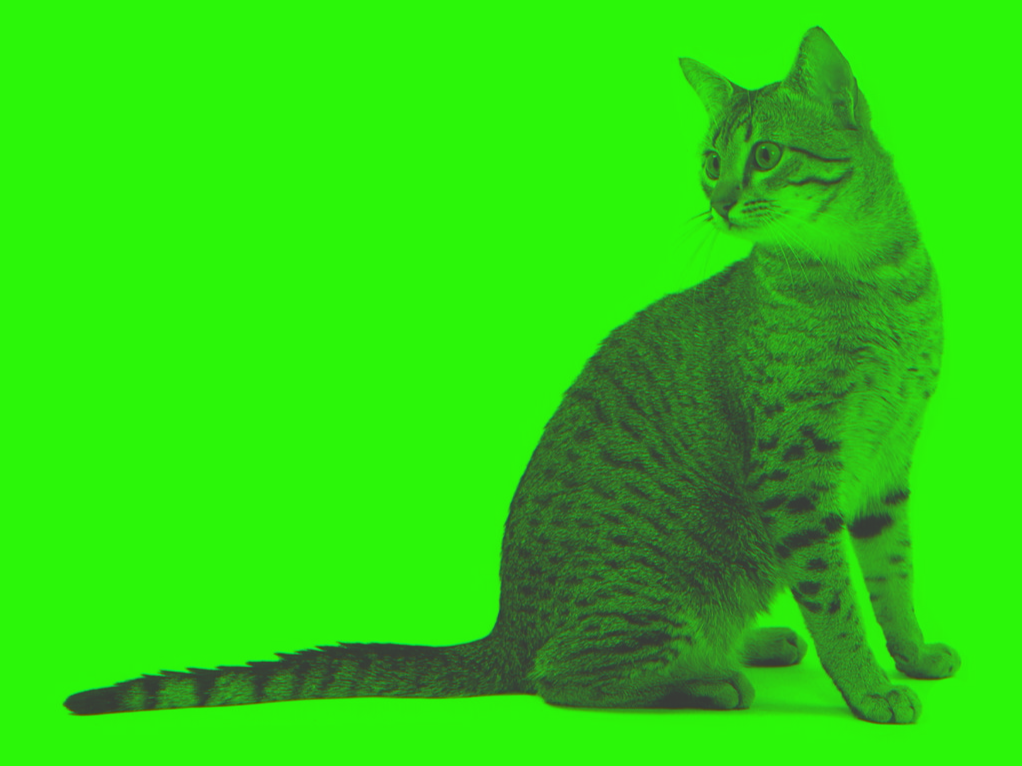

In [ ]:
visualize_cat(model, cat)

นิยาม Model แบบ 2D Convolution โดยรับ Input Image ขนาด 1,440x1,080 Pixel แบบ 3 Channel โดยมี Filter ขนาด 10x10 จำนวน 3 Filter เพื่อนำไป Slide บน Input Image แต่ละ Channel

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(3,(10, 10), input_shape=cat.shape))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 759, 1015, 3)      903       
                                                                 
Total params: 903
Trainable params: 903
Non-trainable params: 0
_________________________________________________________________


Plot ภาพน้องตังค์ฟูล

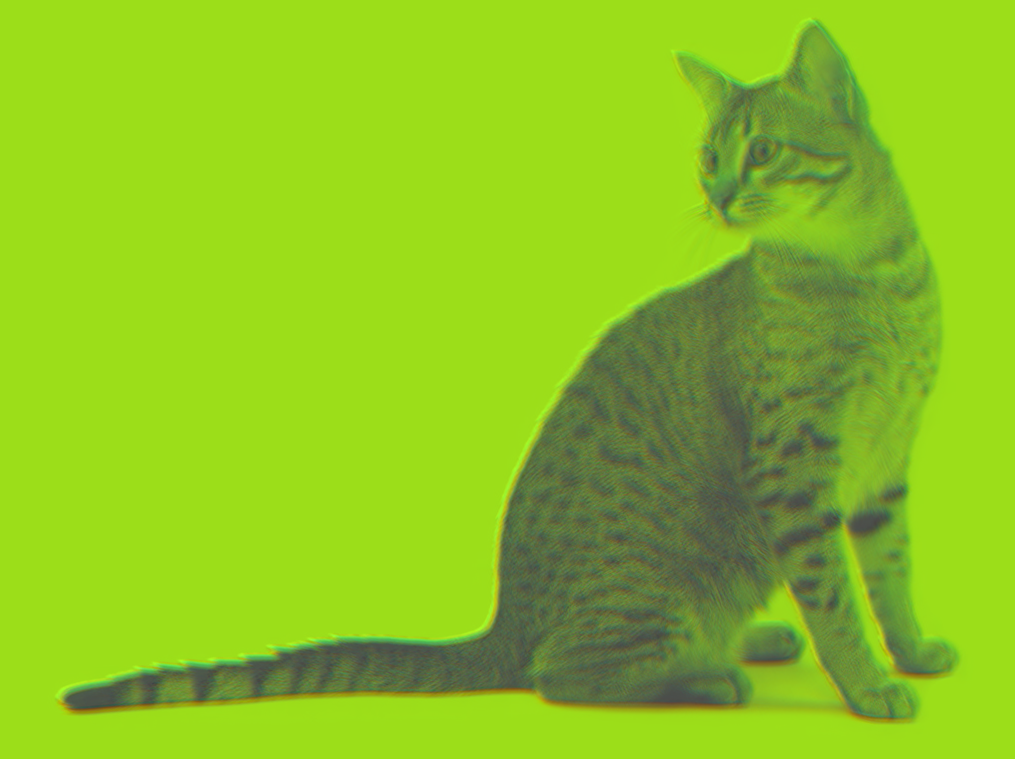

In [ ]:
visualize_cat(model, cat)

นิยาม Model แบบ 2D Convolution โดยรับ Input Image ขนาด 1,440x1,080 Pixel แบบ 3 Channel โดยมี Filter ขนาด 3x3 จำนวน 1 Filter



In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(1,(3,3),input_shape=cat.shape))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 766, 1022, 1)      28        
                                                                 
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________


นิยาม visualize_cat_one_channel Function ที่รับภาพเป็น Matrix ขยายภาพเป็น 4 มิติ แล้ว Predict ภาพ ก่อนจะหดให้เหลือ 2 มิติ เพื่อจะ Plot ภาพ แบบ 1 Channel ต่อไป

In [ ]:
def visualize_cat_one_channel(model, cat):
    cat_batch = np.expand_dims(cat,axis=0)
    conv_cat2 = model(cat_batch)
    conv_cat2 = np.squeeze(conv_cat2, axis=0)
    conv_cat2 = array_to_img(conv_cat2)
    display(conv_cat2)

Plot ภาพน้องตังค์ฟูล

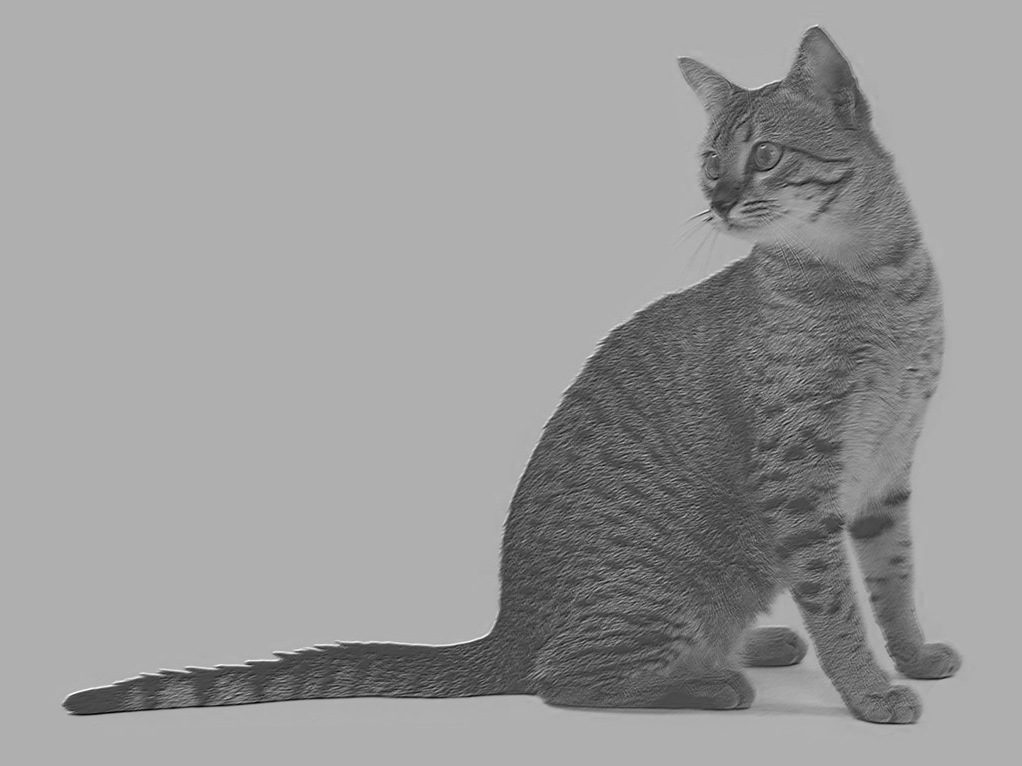

In [ ]:
visualize_cat_one_channel(model, cat)

นิยาม Model แบบ 2D Convolution โดยรับ Input Image ขนาด 1,440x1,080 Pixel แบบ 3 Channel โดยมี Filter ขนาด 20x20 จำนวน 1 Filter

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(1,(20,20),input_shape=cat.shape))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 749, 1005, 1)      1201      
                                                                 
Total params: 1,201
Trainable params: 1,201
Non-trainable params: 0
_________________________________________________________________


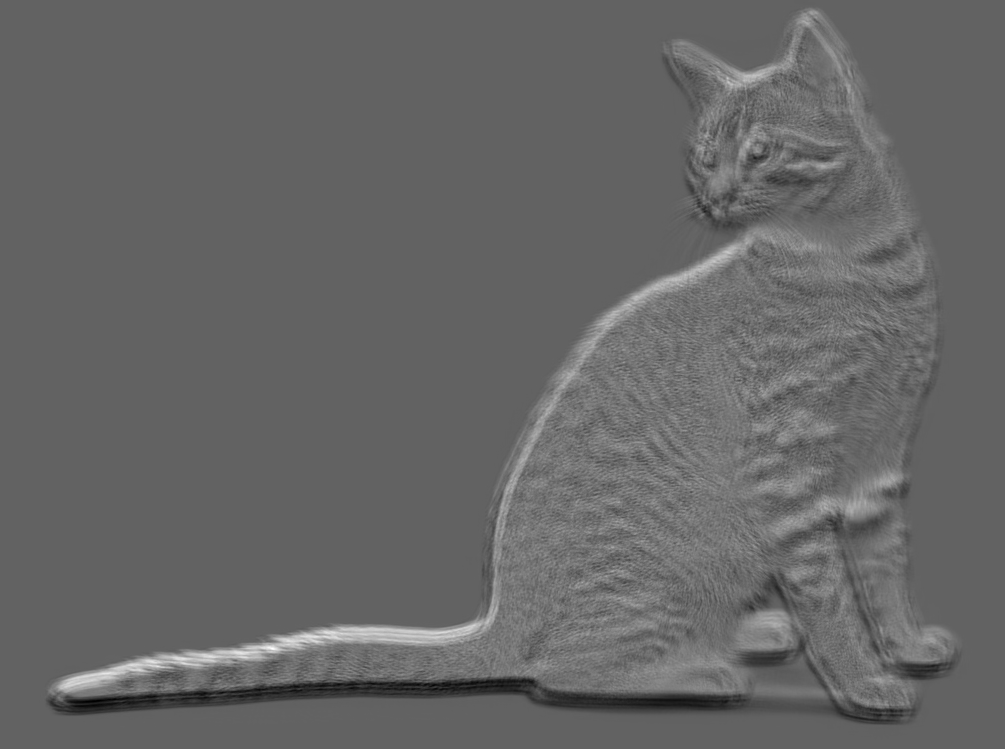

In [ ]:
visualize_cat_one_channel(model, cat)

นิยาม Model แบบ 2D Convolution โดยรับ Input Image ขนาด 1,440x1,080 Pixel แบบ 3 Channel โดยมี Filter ขนาด 20x20 จำนวน 1 Filter และเพิ่ม ReLu Activation Function

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(1,(20,20),input_shape=cat.shape))
model.add(tf.keras.layers.Activation('relu'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 749, 1005, 1)      1201      
                                                                 
 activation (Activation)     (None, 749, 1005, 1)      0         
                                                                 
Total params: 1,201
Trainable params: 1,201
Non-trainable params: 0
_________________________________________________________________


Plot ภาพน้องตังค์ฟูล

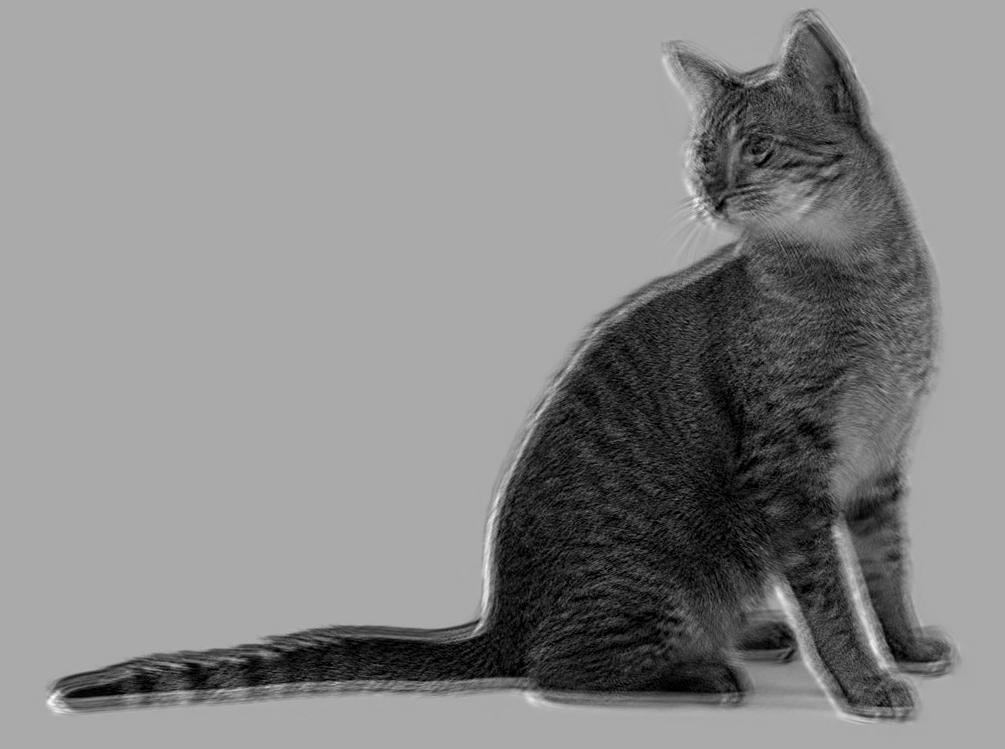

In [ ]:
visualize_cat_one_channel(model, cat)

นิยาม Model แบบ 2D Convolution โดยรับ Input Image ขนาด 1,440x1,080 Pixel แบบ 3 Channel โดยมี Filter ขนาด 3x3 จำนวน 1 Filter และเพิ่ม Max Pooling ขนาด 5x5

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(1,(3,3),input_shape=cat.shape))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(5,5)))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 766, 1022, 1)      28        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 153, 204, 1)      0         
 )                                                               
                                                                 
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________


Plot ภาพน้องตังค์ฟูล

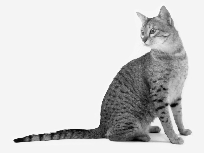

In [ ]:
visualize_cat_one_channel(model, cat)

นิยาม Model แบบ 2D Convolution โดยรับ Input Image ขนาด 1,440x1,080 Pixel แบบ 3 Channel โดยมี Filter ขนาด 3x3 จำนวน 1 Filter เพิ่ม ReLu Activation Function และ Max Pooling ขนาด 5x5

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(1,(3,3),input_shape=cat.shape))

model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(5,5)))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 766, 1022, 1)      28        
                                                                 
 activation_1 (Activation)   (None, 766, 1022, 1)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 153, 204, 1)      0         
 2D)                                                             
                                                                 
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________


Plot ภาพน้องตังค์ฟูล

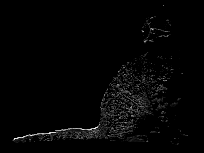

In [ ]:
visualize_cat_one_channel(model, cat)

นิยาม Model แบบ 2D Convolution, ReLu Activation Function และ Max Pooling อย่างละ 2 Layer

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(1,(3,3),input_shape=cat.shape))

model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3)))

model.add(tf.keras.layers.Conv2D(1,(3,3)))

model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3)))

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 766, 1022, 1)      28        
                                                                 
 activation_2 (Activation)   (None, 766, 1022, 1)      0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 255, 340, 1)      0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 253, 338, 1)       10        
                                                                 
 activation_3 (Activation)   (None, 253, 338, 1)       0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 84, 112, 1)       0         
 2D)                                                  

Plot ภาพน้องตังค์ฟูล

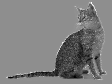

In [ ]:
visualize_cat_one_channel(model, cat)

Fashion-MNIST Model
Fashion-MNIST เป็น Dataset ที่เป็นภาพเสื้อผ้า กระเป๋า และรองเท้า ขนาด 28x28 Pixel แบบ Grayscale แบ่งเป็นข้อมูล Train 60,000 ภาพ และข้อมูล Test อีก 10,000 ภาพ รวมทั้งหมด 10 ประเภท โดยมีการกำหนด Label ตั้งแต่ 0-9 ดังนี้

0: T-shirt/top
1: Trouser
2: Pullover
3: Dress
4: Coat
5: Sandal
6: Shirt
7: Sneaker
8: Bag
9: Ankle boot

เราจะ Train Deep Learning Model แบบ CNN เพื่อ Classify ภาพ 10 ประเภท ของ Fashion-MNIST Dataset แล้วดึง Kernel และ Feature Map ออกมาแสดงผลด้วยภาพ ตามขั้นตอนดังต่อไปนี้

กำหนดค่า Parameter ที่จำเป็น

In [ ]:
IMG_ROWS = 28
IMG_COLS = 28
NUM_CLASSES = 10
VAL_SIZE = 0.2
RANDOM_STATE = 99

BATCH_SIZE = 128

Load Dataset

In [ ]:
(train_data, y), (test_data, y_test) = fashion_mnist.load_data()

print("Fashion MNIST train -  rows:",train_data.shape[0]," columns:", train_data.shape[1], " rows:", train_data.shape[2])
print("Fashion MNIST test -  rows:",test_data.shape[0]," columns:", test_data.shape[1], " rows:", train_data.shape[2])

4422102/4422102 [==============================] - 0s 0us/step
Fashion MNIST train -  rows: 60000  columns: 28  rows: 28
Fashion MNIST test -  rows: 10000  columns: 28  rows: 28


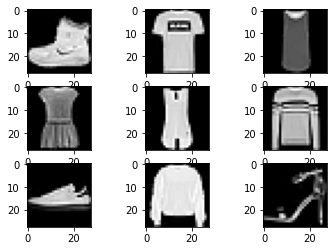

In [ ]:
for i in range(9):
    plt.subplot(330 + 1 + i)    
    plt.imshow(train_data[i], cmap=plt.get_cmap('gray'))

plt.savefig('fashion_mnist.jpeg', dpi=300)

ขยายมิติของ Dataset

In [ ]:
print(train_data.shape, test_data.shape)

train_data = train_data.reshape((train_data.shape[0], 28, 28, 1))
test_data = test_data.reshape((test_data.shape[0], 28, 28, 1))

print(train_data.shape, test_data.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


ทำ Scaling

In [ ]:
train_data = train_data / 255.0
test_data = test_data / 255.0

เข้ารหัสผลเฉลยแบบ One-hot Encoding

In [ ]:
y = to_categorical(y)
y_test = to_categorical(y_test)

print(y.shape, y_test.shape)
y[:10]

(60000, 10) (10000, 10)


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

แบ่งข้อมูลสำหรับ Train และ Validate โดยการสุ่มในสัดส่วน 80:20

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(train_data, y, test_size=VAL_SIZE, random_state=RANDOM_STATE)

x_train.shape, x_val.shape, y_train.shape, y_val.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

นิยาม Function สำหรับ Plot Loss และ Accuracy

In [ ]:
def create_trace(x,y,ylabel,color):
        trace = go.Scatter(
            x = x,y = y,
            name=ylabel,
            marker=dict(color=color),
            mode = "markers+lines",
            text=x
        )
        return trace
    
def plot_accuracy_and_loss(train_model):
    hist = train_model.history
    acc = hist['accuracy']
    val_acc = hist['val_accuracy']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = list(range(1,len(acc)+1))
    
    trace_ta = create_trace(epochs,acc,"Training accuracy", "Green")
    trace_va = create_trace(epochs,val_acc,"Validation accuracy", "Red")
    trace_tl = create_trace(epochs,loss,"Training loss", "Blue")
    trace_vl = create_trace(epochs,val_loss,"Validation loss", "Magenta")
    fig = subplots.make_subplots(rows=1,cols=2, subplot_titles=('Training and validation accuracy',
                                                             'Training and validation loss'))
    fig.append_trace(trace_ta,1,1)
    fig.append_trace(trace_va,1,1)
    fig.append_trace(trace_tl,1,2)
    fig.append_trace(trace_vl,1,2)
    fig['layout']['xaxis'].update(title = 'Epoch')
    fig['layout']['xaxis2'].update(title = 'Epoch')
    fig['layout']['yaxis'].update(title = 'Accuracy', range=[0,1])
    fig['layout']['yaxis2'].update(title = 'Loss', range=[0,1])

    plotly.offline.iplot(fig, filename='accuracy-loss')

นิยามวิธีการทำ Image Augmentation

In [ ]:
datagen = ImageDataGenerator(
        rotation_range=0.05,    #Randomly rotate images in the range
        zoom_range = 0.2,       # Randomly zoom image
        width_shift_range=0.1,  #Randomly shift images horizontally
        height_shift_range=0.1, #Randomly shift images vertically
        shear_range=0.05        #Randomly shear images
)

datagen.fit(x_train)

นิยาม Model

In [ ]:
model = tf.keras.Sequential()

#1. CNN LAYER
model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', input_shape=(28, 28, 1), name = 'conv2d1'))
model.add(tf.keras.layers.BatchNormalization(name = 'batch_norm1'))
model.add(tf.keras.layers.Activation("relu", name = 'relu1'))
model.add(tf.keras.layers.Dropout(0.3, name = 'dropout1'))

#2. CNN LAYER
model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', name = 'conv2d2'))
model.add(tf.keras.layers.BatchNormalization(name = 'batch_norm2'))
model.add(tf.keras.layers.Activation("relu", name = 'relu2'))

model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), name = 'maxpool2d1'))
model.add(tf.keras.layers.Dropout(0.3, name = 'dropout2'))

#3. CNN LAYER
model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', name = 'conv2d3'))
model.add(tf.keras.layers.BatchNormalization(name = 'batch_norm3'))
model.add(tf.keras.layers.Activation("relu", name = 'relu3'))
model.add(tf.keras.layers.Dropout(0.3, name = 'dropout3'))

#4. CNN LAYER
model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', name = 'conv2d4'))
model.add(tf.keras.layers.BatchNormalization(name = 'batch_norm4'))
model.add(tf.keras.layers.Activation("relu", name = 'relu4'))

model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), name = 'maxpool2d2'))
model.add(tf.keras.layers.Dropout(0.3, name = 'dropout4'))


#FULLY CONNECTED LAYER
model.add(tf.keras.layers.Flatten(name = 'flatten1'))
model.add(tf.keras.layers.Dense(256, name = 'dense1'))
model.add(tf.keras.layers.BatchNormalization(name = 'batch_norm5'))
model.add(tf.keras.layers.Activation("relu", name = 'relu5'))
model.add(tf.keras.layers.Dropout(0.30, name = 'dropout5'))

#OUTPUT LAYER
model.add(tf.keras.layers.Dense(10, activation='softmax', name = 'dense2'))

Compile Model

In [ ]:
optimizer = Adam()
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics=["accuracy"])

นิยามการทำ Checkpoint เพื่อ Save Model เฉพาะ Epoch ที่ค่า val_loss น้อยกว่ารอบก่อนหน้า

In [ ]:
filepath="weights.best.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d1 (Conv2D)            (None, 28, 28, 32)        320       
                                                                 
 batch_norm1 (BatchNormaliza  (None, 28, 28, 32)       128       
 tion)                                                           
                                                                 
 relu1 (Activation)          (None, 28, 28, 32)        0         
                                                                 
 dropout1 (Dropout)          (None, 28, 28, 32)        0         
                                                                 
 conv2d2 (Conv2D)            (None, 28, 28, 32)        9248      
                                                                 
 batch_norm2 (BatchNormaliza  (None, 28, 28, 32)       128       
 tion)                                                

Train Model

In [ ]:
NO_EPOCHS = 10
history = model.fit(datagen.flow(x_train, y_train, batch_size=BATCH_SIZE),
                              shuffle=True,
                              epochs=NO_EPOCHS, validation_data = (x_val, y_val),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // BATCH_SIZE,
                              callbacks=callbacks_list)

Epoch 1/10
374/375 [============================>.] - ETA: 0s - loss: 0.6397 - accuracy: 0.7556
Epoch 1: val_loss improved from inf to 0.86153, saving model to weights.best.h5
375/375 [==============================] - 22s 57ms/step - loss: 0.6399 - accuracy: 0.7555 - val_loss: 0.8615 - val_accuracy: 0.6918
Epoch 2/10
375/375 [==============================] - ETA: 0s - loss: 0.5202 - accuracy: 0.8025
Epoch 2: val_loss improved from 0.86153 to 0.37255, saving model to weights.best.h5
375/375 [==============================] - 21s 55ms/step - loss: 0.5202 - accuracy: 0.8025 - val_loss: 0.3725 - val_accuracy: 0.8637
Epoch 3/10
375/375 [==============================] - ETA: 0s - loss: 0.4653 - accuracy: 0.8256
Epoch 3: val_loss improved from 0.37255 to 0.31601, saving model to weights.best.h5
375/375 [==============================] - 21s 56ms/step - loss: 0.4653 - accuracy: 0.8256 - val_loss: 0.3160 - val_accuracy: 0.8824
Epoch 4/10
375/375 [==============================] - ETA: 0s - l

Plot Loss และ Accuracy

In [ ]:
plot_accuracy_and_loss(history)

Load Weight ของ Model ที่ค่า val_loss น้อยที่สุด

In [ ]:
predict_model = load_model(filepath)

Evaluation

In [ ]:
score = predict_model.evaluate(test_data, y_test,verbose=0)
print("Test Loss:",score[0])
print("Test Accuracy:",score[1])

#Visualizing Kernel

เราสามารถเลือก Kernel และ Feature Map ตาม Layer ต่างๆ ของ Model จากชื่อ Layer หรือระบุ Layer ที่ต้องการโดยใช้ Index

In [ ]:
predict_model.summary()

NameError: ignored

Kernel และ Bias จะอยู่ที่ CNN Layer เท่านั้น ดังนั้นเราจึงต้องดึงมันออกมาจาก Layer ที่มี String "conv" เป็นส่วนหนึ่งของชื่อ Layer ซึ่งเราได้กำหนดไว้ตอนนิยาม Model

In [ ]:
kernel_bias = []
for layer in predict_model.layers:
    if 'conv' not in layer.name:
        continue
    kernels, biases = layer.get_weights()
    kernel_bias.append([kernels, biases])
    print(layer.name, kernels.shape)

จากภาพด้านบน Kernel ภายใน CNN Layer จะถูกเก็บเป็น Matrix ขนาด 4 มิติ ที่ประกอบด้วย Kernel Size (3x3) x จำนวน Input Channel x จำนวน Filter

ดึงมาเฉพาะ Kernel ใน CNN Layer ที่ 1 มาแสดง

In [ ]:
kernels, biases = kernel_bias[0]

kernels.shape, biases.shape

ทำ Scaling ให้ค่าของ Kernel อยู่ในช่วง 0-1 เพื่อจะแสดงผลด้วยภาพ

In [ ]:
k_min, k_max = kernels.min(), kernels.max()
kernels = (kernels - k_min) / (k_max - k_min)

แสดงภาพ Kernel ทั้งหมด 32 Kernel จาก CNN Layer ที่ 1 โดยจุด (สี่เหลี่ยม) ที่มืด หมายถึงค่า Weight ที่เล็ก และจุดที่สว่างกว่าแสดงถึงค่า Weight ที่ใหญ่กว่า


In [ ]:
n_kernels, ix = 32, 1
for i in range(n_kernels):
    f = kernels[:, :, :, i]
    for j in range(1):
        ax = plt.subplot(8, 4, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.imshow(f[:, :, j], cmap='gray')
        ix += 1
plt.savefig('filter.jpeg', dpi=300)

#Visualizing Feature Map

เราจะแสดงภาพ Feature Map ที่ถูกสร้างขึ้นด้วยการนำ Input Image มา Predict กับ Fashion-MNIST Model ซึ่งมีการ Train มาก่อน ตามขั้นตอนดังต่อไปนี้

นิยาม Model โดยกำหนดให้ดึง Feature Map ออกมาจาก CNN Layer ที่ 1

In [ ]:
model = tf.keras.models.Model(inputs=predict_model.inputs, outputs=predict_model.layers[0].output)

model.summary(

ดึงภาพ 1 ภาพ จาก Fashion-MNIST Dataset

In [ ]:
img = x_train[10:11]

Predict Model

In [ ]:
feature_maps = model(img)

feature_maps.shape

แสดงภาพ Feature Map จาก CNN Layer ที่ 1 ทั้งหมด 32 Feature Map

In [ ]:
ix = 1
for _ in range(8):
    for _ in range(4):
        ax = plt.subplot(8, 4, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
        ix += 1
plt.savefig('feature_map1.jpeg', dpi=300)

นิยาม Model โดยกำหนดให้ดึง Feature Map ออกมาจาก ReLu Layer ที่ 1

In [ ]:
model = tf.keras.models.Model(inputs=predict_model.inputs, outputs=predict_model.layers[2].output)

model.summary()

Predict Model

แสดงภาพ Feature Map จาก ReLu Layer ที่ 1 ทั้งหมด 32 Feature Map

In [ ]:
ix = 1
for _ in range(8):
    for _ in range(4):
        ax = plt.subplot(8, 4, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
        ix += 1
plt.savefig('feature_map2.jpeg', dpi=300)

นิยาม Model โดยกำหนดให้ดึง Feature Map ออกมาจาก CNN Layer ที่ 2

In [ ]:
model = tf.keras.models.Model(inputs=predict_model.inputs, outputs=predict_model.layers[4].output)

model.summary()

Predict Model

In [ ]:
feature_maps = model(img)

feature_maps.shape

แสดงภาพ Feature Map จาก CNN Layer ที่ 2 ทั้งหมด 32 Feature Map

In [ ]:
ix = 1
for _ in range(8):
    for _ in range(4):
        ax = plt.subplot(8, 4, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
        ix += 1
plt.savefig('feature_map3.jpeg', dpi=300)

นิยาม Model โดยกำหนดให้ดึง Feature Map ออกมาจาก Maxpool Layer ที่ 2

In [ ]:
model = tf.keras.models.Model(inputs=predict_model.inputs, outputs=predict_model.layers[16].output)

model.summary()

Predict Model

In [ ]:
feature_maps = model(img)

feature_maps.shape


แสดงภาพ Feature Map จาก Maxpool Layer ที่ 2 ทั้งหมด 64 Feature Map

In [ ]:
ix = 1
for _ in range(8):
    for _ in range(8):
        ax = plt.subplot(8, 8, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
        ix += 1
plt.savefig('feature_map4.jpeg', dpi=300)

จากภาพตัวอย่างของ Feature Map ทั้ง 4 ตัวอย่าง จะเห็นได้ว่า Feature Map ที่อยู่ใกล้กับ Input ของ Model จะจับรายละเอียดของภาพได้มาก แต่เมื่อมันถูกประมวลผลใน Layer ที่ลึกลงไป Feature Map จะแสดงรายละเอียดของภาพน้อยลง ทำให้เราไม่สามารถตีความจากภาพได้มากนัก

อย่างไรก็ตาม รูปแบบของ Feature Map ดังกล่าวก็เป็นสิ่งที่เราคาดการณ์ว่าจะเกิดขึ้นกับ CNN Model ซึ่งพยายามเรียนรู้ที่จะแปลงข้อมูลที่มีความสัมพันธ์เชิงพื้นที่ไปสู่ข้อมูลที่มีความเป็น Abstract/Concept  คือ มีการลดรายละเอียดของภาพ แต่เพิ่มสารสนเทศระดับสูง (Height Level Information) โดยอัตโนมัติในขณะที่มีการ Train Model ครับ

นิยาม Model โดยกำหนดให้ดึง Feature Map ออกมาจาก Maxpool Layer ที่ 2